# Naive Bayes LAB

In this lab we are going to be implementing the Naive Bayes Algorithm from scratch using the mushrooms dataset.

This dataset is a categorical dataset that is used to predict if a mushroom is poisonous or not based on some features.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('mushrooms.csv')

## Exploratory Data Analysis
We are now going to try and understand the dataset and its characteristics

In [3]:
# View the first few rows of the dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Checking to see the columns of the dataset
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
# View the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

We can see that there are no missing values and all the columns are categorical.

In [6]:
# Now to get abit more description
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


We can see that there is no class imbalance


<Axes: xlabel='cap-shape'>

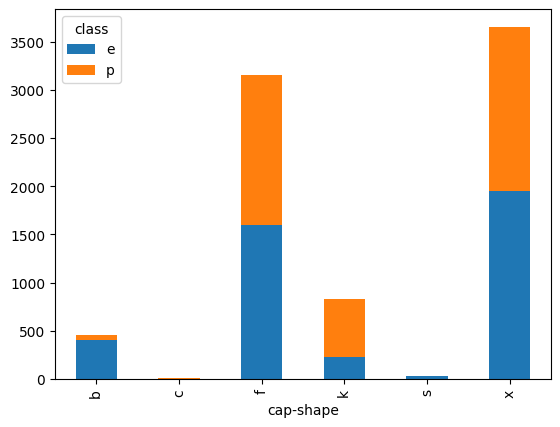

In [7]:
# Comparing cap shape and class
pd.crosstab(df['cap-shape'], df['class']).plot(kind='bar', stacked=True)

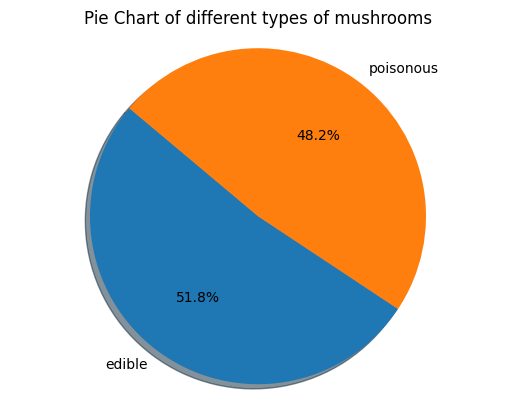

In [8]:
# Checking the distribution of the target variable
values = df['class'].value_counts()
values
x = ['edible', 'poisonous']
plt.pie(values, labels = x, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of different types of mushrooms')
plt.show()

<Axes: xlabel='habitat'>

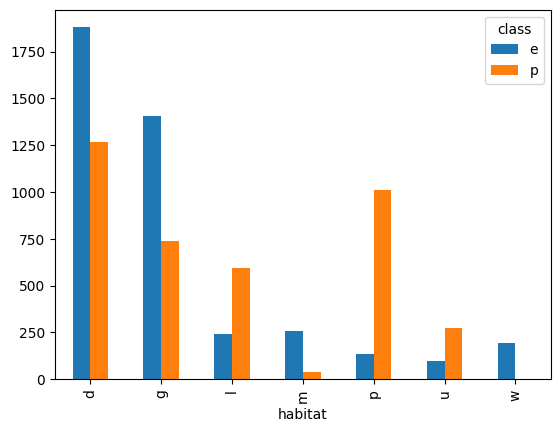

In [9]:
# We now want to see which habitat produces the most edible/poisonous mushrooms
pd.crosstab(df['habitat'], df['class']).plot(kind='bar')

## Data Preprocessing
In this section we are going to prepare the data for using in the model

In [10]:
# We will now split our data into train and test
from sklearn.model_selection import train_test_split
X = df.drop(['class'],axis=1)
y = df['class']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [11]:
def _calc_class_prior(self):
    """ P(c) - Prior Class Probability """

    print("🧮 Class Prior Probabilities (P(c)):")
    print(f"{'Class':<12} {'P(c)':<10}")
    print("-" * 24)

    for outcome in np.unique(self.y_train):
        outcome_count = sum(self.y_train == outcome)
        prior = outcome_count / self.train_size
        self.class_priors[outcome] = prior

        print(f"{outcome:<12} {prior:<10.4f}")

## The Naive Bayes Classifier from Scratch

In [12]:
def accuracy_score(y_true, y_pred):

	"""	score = (y_true - y_pred) / len(y_true) """

	return round(float(sum(y_pred == y_test))/float(len(y_test)) * 100 ,2)

def pre_processing(df):

	""" partioning data into features and target """

	X = df.drop(['class'], axis=1)
	y = df['class']

	return X, y



class  NaiveBayes:

	"""
		Bayes Theorem:
										Likelihood * Class prior probability
				Posterior Probability = -------------------------------------
											Predictor prior probability

							  			 P(x|c) * p(c)
							   P(c|x) = ------------------
											  P(x)
	"""

	def __init__(self):

		"""
			Attributes:
				likelihoods: Likelihood of each feature per class
				class_priors: Prior probabilities of classes
				pred_priors: Prior probabilities of features
				features: All features of dataset
		"""
		self.features = list
		self.likelihoods = {}
		self.class_priors = {}
		self.pred_priors = {}

		self.X_train = np.array
		self.y_train = np.array
		self.train_size = int
		self.num_feats = int

	def fit(self, X, y):

		self.features = list(X.columns)
		self.X_train = X
		self.y_train = y
		self.train_size = X.shape[0]
		self.num_feats = X.shape[1]

		for feature in self.features:
			self.likelihoods[feature] = {}
			self.pred_priors[feature] = {}

			for feat_val in np.unique(self.X_train[feature]):
				self.pred_priors[feature].update({feat_val: 0})

				for outcome in np.unique(self.y_train):
					self.likelihoods[feature].update({feat_val+'_'+outcome:0})
					self.class_priors.update({outcome: 0})

		self._calc_class_prior()
		self._calc_likelihoods()
		self._calc_predictor_prior()

	def _calc_class_prior(self):

		""" P(c) - Prior Class Probability """

		for outcome in np.unique(self.y_train):# This loops over each unique class label
			outcome_count = sum(self.y_train == outcome) # Count how many times this class appears in training data
			self.class_priors[outcome] = outcome_count / self.train_size # Divide by total samples to get P(c)

	def _calc_likelihoods(self):

		""" P(x|c) - Likelihood """

		for feature in self.features:# iterates through each feature column

			for outcome in np.unique(self.y_train): # iterates through each unique class (e.g 'edible','poisonous')
				outcome_count = sum(self.y_train == outcome) # Counts how many training samples belong to the class outcome
        # In this section it gets the indices where class == outcome, uses those indices to select rows from X_train[feature].
        # It then calls the .value_counts() to count how many times each value of the feature appears for that class.
				feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

        # Calculates the likelihood P(x = v| y = c) = count of (feature value v, class c) / count of class c
        # stores it in a dictionary self.likelihoods using a key
				for feat_val, count in feat_likelihood.items():
					self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count


	def _calc_predictor_prior(self):

		""" P(x) - Evidence """

		for feature in self.features:# this loops through all feature columns in the training data
			feat_vals = self.X_train[feature].value_counts().to_dict() # This line: gets how many times each value appears in that feature and converts it to a dictionary

			for feat_val, count in feat_vals.items():# This loops over the value-count pairs
				self.pred_priors[feature][feat_val] = count/self.train_size # This calculates the probability of that feature value occuring in the training set, regardless of class


	def predict(self, X):

		""" Calculates Posterior probability P(c|x) """

		results = []
		X = np.array(X)# Converts input to NumPy array

		for query in X: # Query is a single row in the X
			probs_outcome = {}
			for outcome in np.unique(self.y_train): # Loops over each class (like 'edible','poisonous')
				prior = self.class_priors[outcome] # This is P(c) - How likely is this class overall
				likelihood = 1 # Initialize likelihood and evidence
				evidence = 1

				for feat, feat_val in zip(self.features, query):
					likelihood *= self.likelihoods[feat][feat_val + '_' + outcome] # Multiplies P(xi = v | y = c) across all features
					evidence *= self.pred_priors[feat][feat_val]# multiplies P(xi = v) across all features (i.e., the denominator in Bayes' Rule)
        # Calculate Posterior which is Bayes' Rule
				posterior = (likelihood * prior) / (evidence)
        # Store results
				probs_outcome[outcome] = posterior
      # Pick class with highest probability and store it
			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			results.append(result)
    # Return all predictions which is a NumPy array of predicted class labels for each row of input data
		return np.array(results)



if __name__ == "__main__":

	#Mushrooms Dataset
	print("Mushrooms Dataset ")

	df = pd.read_csv("mushrooms.csv")
	#print(df)

	#Split fearures and target
	X,y  = pre_processing(df)

	nb_clf = NaiveBayes()
	nb_clf.fit(X_train, y_train)


	print("Train Accuracy: {}".format(accuracy_score(y, nb_clf.predict(X_test))))

	#

Mushrooms Dataset 
Train Accuracy: 99.94


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb_clf.predict(X_test))
print(cm)

[[851   1]
 [  0 773]]


In [15]:
# Separately calculating probability of classes P(y) for documentation purposes
def calculate_mushroom_class_priors(df):
    """
    Calculates and prints the prior probabilities P(y) from the mushroom dataset.

    Parameters:
    df (pd.DataFrame): The full mushroom dataset with a 'class' column.

    Returns:
    dict: A dictionary with class labels ('e' or 'p') and their prior probabilities.
    """
    y = df['class']
    total = len(y)
    class_counts = y.value_counts()
    class_probs = (class_counts / total).to_dict()

    print("🍄 Mushroom Class Prior Probabilities P(y):")
    print(f"{'Class':<12} {'P(y)':<10}")
    print("-" * 24)
    for cls, prob in class_probs.items():
        label = 'edible' if cls == 'e' else 'poisonous'
        print(f"{label:<12} {prob:<10.4f}")

    return class_probs

In [ ]:
calculate_mushroom_class_priors(df)

In [16]:
# Populating the likelihood tables for my dataset
import pandas as pd

def display_likelihood_tables(df, target_col='class'):
    """
    Prints likelihood tables P(feature value | class) for all categorical features.

    Parameters:
    df : pandas DataFrame - The mushroom dataset
    target_col : str - Name of the target column (default is 'class')
    """
    classes = df[target_col].unique()
    features = df.columns.drop(target_col)

    for feature in features:
        print(f"\n# {feature}")
        header = df[feature].unique()
        print(f"{'':<10}", end='')
        for val in header:
            print(f"{val:<12}", end='')
        print()

        for cls in classes:
            subset = df[df[target_col] == cls]
            total = len(subset)
            print(f"{'P(' + cls + ')':<10}", end='')
            for val in header:
                count = sum(subset[feature] == val)
                likelihood = f"{count}/{total}"
                print(f"{likelihood:<12}", end='')
            print()

        print(f"{'-' * (10 + 12 * len(header))}")


In [17]:
display_likelihood_tables(df)


# cap-shape
          x           b           s           f           k           c           
P(p)      1708/3916   48/3916     0/3916      1556/3916   600/3916    4/3916      
P(e)      1948/4208   404/4208    32/4208     1596/4208   228/4208    0/4208      
----------------------------------------------------------------------------------

# cap-surface
          s           y           f           g           
P(p)      1412/3916   1740/3916   760/3916    4/3916      
P(e)      1144/4208   1504/4208   1560/4208   0/4208      
----------------------------------------------------------

# cap-color
          n           y           w           g           e           p           b           u           c           r           
P(p)      1020/3916   672/3916    320/3916    808/3916    876/3916    88/3916     120/3916    0/3916      12/3916     0/3916      
P(e)      1264/4208   400/4208    720/4208    1032/4208   624/4208    56/4208     48/4208     16/4208     32/4208     16/4208    

In [18]:
def display_mushroom_naive_bayes_query(nb_clf):
    print("\nQuery: Is a mushroom with these features edible or poisonous?")
    query = {
        "cap-shape": "x",     # convex
        "cap-surface": "s",   # smooth
        "cap-color": "n",     # brown
        "bruises": "t",       # bruises
        "odor": "p"           # pungent
    }

    print("\nFeatures:")
    for feat, val in query.items():
        print(f"  {feat} = {val}")

    outcomes = np.unique(nb_clf.y_train)
    results = {}
    numerator_debug = {}

    print("\nCalculation of Posterior Probabilities:")
    denominator = 1
    for feat, val in query.items():
        prob = nb_clf.pred_priors[feat].get(val, 1e-6)  # Avoid division by 0
        denominator *= prob

    print(f"\nDenominator = P(x) = product of P({val}) for each feature = {round(denominator, 6)}\n")

    for outcome in outcomes:
        prior = nb_clf.class_priors[outcome]
        likelihood = 1
        stepwise = []

        for feat, val in query.items():
            key = val + "_" + outcome
            feat_likelihood = nb_clf.likelihoods[feat].get(key, 1e-6)  # Smoothing fallback
            likelihood *= feat_likelihood
            stepwise.append(f"P({feat}={val} | class={outcome}) = {round(feat_likelihood, 4)}")

        numerator = likelihood * prior
        posterior = numerator / denominator
        results[outcome] = posterior
        numerator_debug[outcome] = (numerator, prior, stepwise)

    for outcome, posterior in results.items():
        numerator, prior, steps = numerator_debug[outcome]
        print(f"P(class={outcome} | x):")
        for step in steps:
            print(f"    {step}")
        print(f"    P(class={outcome}) = {round(prior, 4)}")
        print(f"  => Numerator = {round(numerator, 6)}")
        print(f"  => Posterior = {round(posterior, 4)}\n")

    prediction = max(results, key=results.get)
    print(f"Final Classification: The mushroom is likely to be '{prediction.upper()}' 🍄")

# Run this after training your model
# df = pd.read_csv("mushrooms.csv")
# X, y = pre_processing(df)
# nb_clf = NaiveBayes()
# nb_clf.fit(X, y)
display_mushroom_naive_bayes_query(nb_clf)


Query: Is a mushroom with these features edible or poisonous?

Features:
  cap-shape = x
  cap-surface = s
  cap-color = n
  bruises = t
  odor = p

Calculation of Posterior Probabilities:

Denominator = P(x) = product of P(p) for each feature = 0.000534

P(class=e | x):
    P(cap-shape=x | class=e) = 0.4592
    P(cap-surface=s | class=e) = 0.2649
    P(cap-color=n | class=e) = 0.301
    P(bruises=t | class=e) = 0.6526
    P(odor=p | class=e) = 0
    P(class=e) = 0.5164
  => Numerator = 0.0
  => Posterior = 0.0

P(class=p | x):
    P(cap-shape=x | class=p) = 0.4353
    P(cap-surface=s | class=p) = 0.3627
    P(cap-color=n | class=p) = 0.2603
    P(bruises=t | class=p) = 0.1607
    P(odor=p | class=p) = 0.0678
    P(class=p) = 0.4836
  => Numerator = 0.000216
  => Posterior = 0.405

Final Classification: The mushroom is likely to be 'P' 🍄
